In [1]:
# 📁 Step 1: Upload ZIP File Manually
from google.colab import files
uploaded = files.upload()


Saving customer.zip to customer.zip


In [2]:
# 📦 Step 2: Extract ZIP File
import zipfile
import os

zip_file = list(uploaded.keys())[0]
extract_folder = "customer"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("✅ Dataset extracted successfully.")

✅ Dataset extracted successfully.


In [3]:
# 📊 Step 3: Load Dataset CSV (Update filename if needed)
import pandas as pd

file_path = f"{extract_folder}/Churn_Modelling.csv"  # ✅ Update filename if different
df = pd.read_csv(file_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# 📈 Step 4: Explore Data Structure
print("\n🔍 Data Info:")
df.info()

print("\n📊 Descriptive Statistics:")
print(df.describe())

print("\n🔍 Missing Values:")
print(df.isnull().sum())


🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

📊 Descriptive Statistics:
         RowNumber    CustomerId   CreditScore       

In [6]:
# 🧹 Step 5: Handle Missing Values (Simple Imputation)
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include='number').columns
imp = SimpleImputer(strategy='mean')
df[num_cols] = imp.fit_transform(df[num_cols])

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [10]:
# 🔤 Step 6: Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


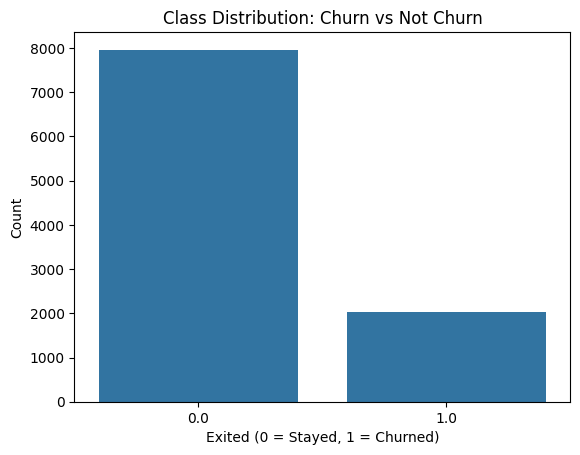

In [12]:
# 📊 Step 7: Visualize Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'Exited'  # ✅ Corrected label column name
sns.countplot(x=target_col, data=df)
plt.title("Class Distribution: Churn vs Not Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.show()


In [13]:
# 📌 Step 8: Train-Test Split
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# 🤖 Step 9: Train Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


✅ Accuracy: 0.8687

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2416
         1.0       0.79      0.44      0.57       584

    accuracy                           0.87      3000
   macro avg       0.84      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



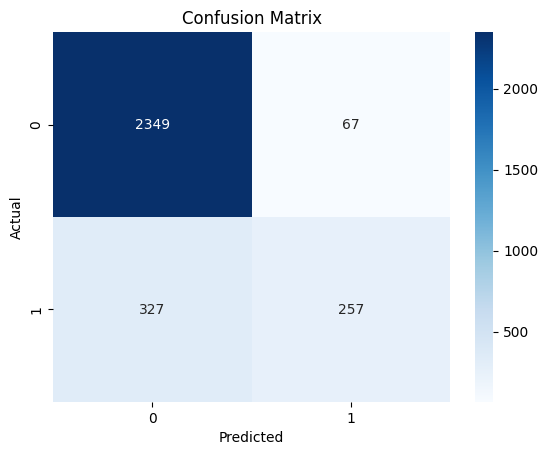

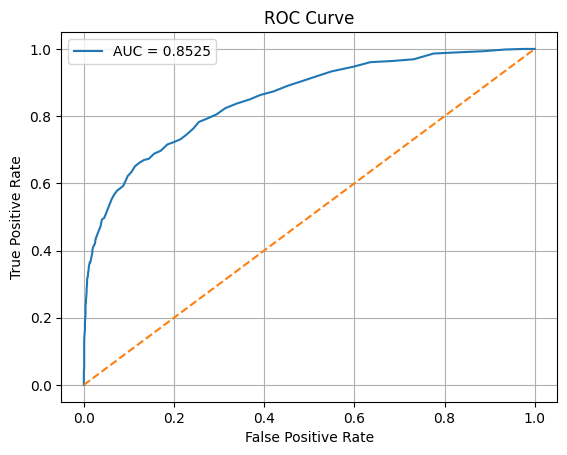

In [15]:
# 📈 Step 10: Evaluate Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 ROC Curve
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

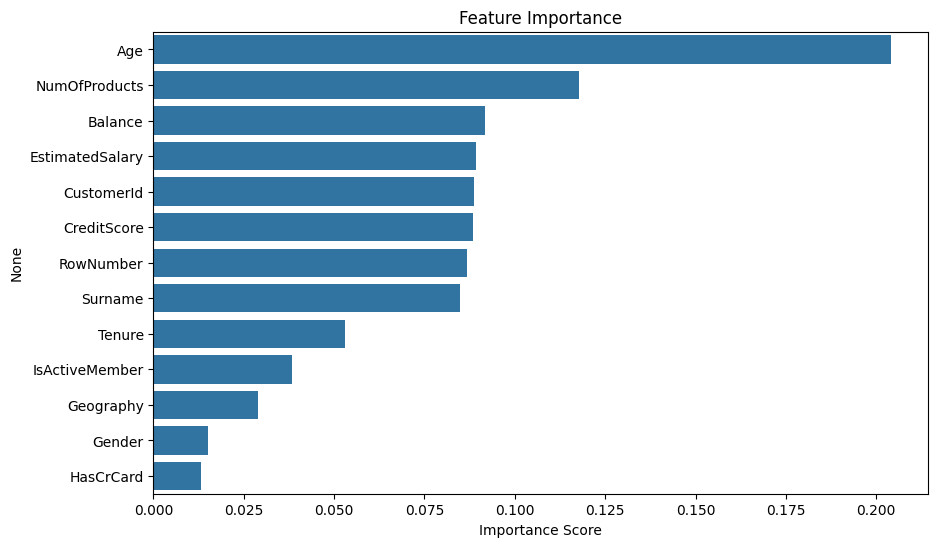

In [17]:
# 🔍 Step 11: Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()
